In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create example dataset
np.random.seed(0)

# Number of subjects
n_subjects = 50

# Number of time points
n_timepoints = 3

# Create data frame
data = pd.DataFrame({
    'Subject': np.repeat(range(1, n_subjects + 1), n_timepoints),
    'Time': np.tile(['T1', 'T2', 'T3'], n_subjects),
    'Age': np.random.randint(18, 65, n_subjects * n_timepoints),  # Random ages between 18 and 65
    'Gender': np.random.choice(['Male', 'Female'], n_subjects * n_timepoints),
    'Intervention': np.random.choice(['A', 'B'], n_subjects * n_timepoints),
    'Score': np.random.normal(0, 1, n_subjects * n_timepoints)  # Random scores
})

data.loc[data['Intervention'] == 'B', 'Score'] += 1


In [20]:
data

,Subject,Time,Age,Gender,Intervention,Score
0,1,T1,62,Male,A,-0.104753
1,1,T2,18,Male,A,-0.151042
2,1,T3,21,Female,A,0.844626
3,2,T1,21,Female,A,0.908642
4,2,T2,57,Male,B,1.982422
...,...,...,...,...,...,...
145,49,T2,31,Female,B,0.910526
146,49,T3,48,Male,A,0.558142
147,50,T1,42,Female,B,1.755725
148,50,T2,20,Male,B,1.478215


In [21]:
# Fit linear mixed model with covariates
formula = 'Score ~ Time + Age + Gender + Intervention + (1 | Subject)'
lmm = smf.mixedlm(formula, data, groups=data['Subject']).fit()
print(lmm.summary())

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Score    
No. Observations:    150      Method:              REML     
No. Groups:          50       Scale:               1.1668   
Min. group size:     3        Log-Likelihood:      -233.7453
Max. group size:     3        Converged:           Yes      
Mean group size:     3.0                                    
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         -0.491    0.350 -1.403 0.161 -1.177  0.195
Time[T.T2]         0.199    0.216  0.920 0.358 -0.225  0.623
Time[T.T3]        -0.070    0.217 -0.325 0.745 -0.495  0.355
Gender[T.Male]     0.155    0.186  0.834 0.404 -0.209  0.518
Intervention[T.B]  1.152    0.178  6.463 0.000  0.803  1.501
Age                0.006    0.006  0.911 0.362 -0.007  0.018
1 | Subject        0.005    0.006  0

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\USER\AppData\Local\Temp\ipykernel_2540\666320752.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Time', y='Score', hue='Intervention', style='Gender', markers=True, ci=None, palette='Set1')


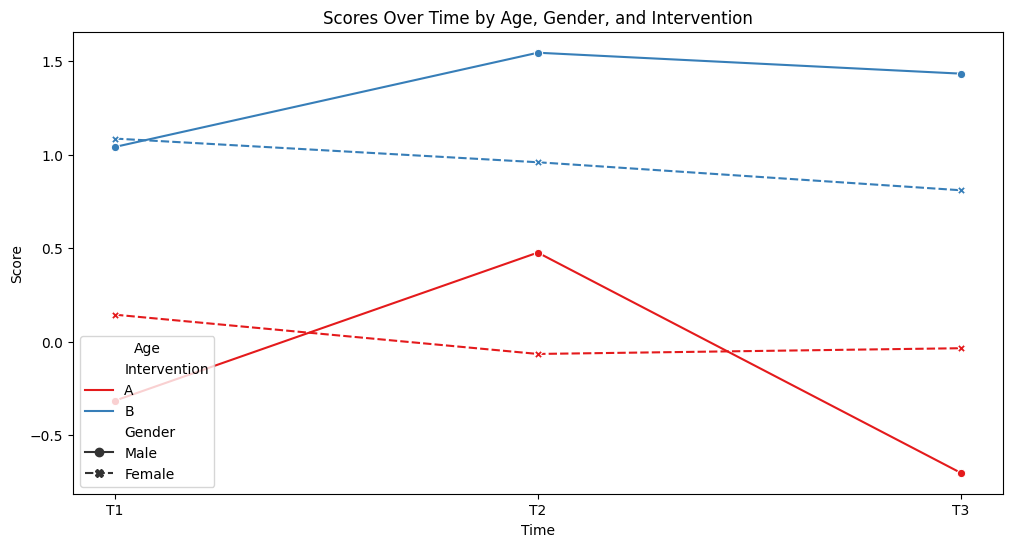

In [25]:
# Line plot for scores over time by intervention group
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Time', y='Score', hue='Intervention', style='Gender', markers=True, ci=None, palette='Set1')
plt.title('Scores Over Time by Age, Gender, and Intervention')
plt.xlabel('Time')
plt.ylabel('Score')
plt.legend(title='Age')
plt.show()

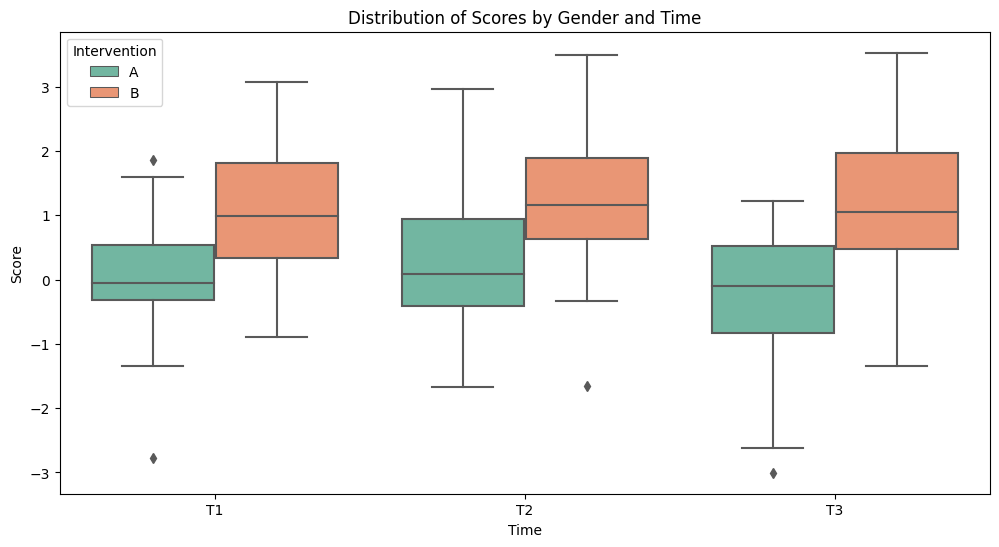

In [27]:
# Box plots for scores by intervention group at each time point
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Time', y='Score', hue='Intervention', palette='Set2')
plt.title('Distribution of Scores by Gender and Time')
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

Intercept           -0.190534
Time[T.T2]           0.520989
Time[T.T3]           0.545680
Intervention[T.B]    1.081433
1 | Subject         -0.008878
Group Var            0.123742
dtype: float64